# Problem 3


Injamam Ul Karim, 18931984       
Muhammad Imran, 12435579

Task 1

In [1]:
import pandas as pd

routes = pd.read_csv('routes.txt', sep=',') 
trips = pd.read_csv('trips.txt', sep=',')
shapes = pd.read_csv('shapes.txt', sep=',')
stop_times = pd.read_csv('stop_times.txt', sep=',')
stops = pd.read_csv('stops.txt', sep=',')
agency = pd.read_csv('agency.txt', sep=',')

print(routes.head(2))
print(trips.head(2))
print(shapes.head(2))
print(stop_times.head(2))
print(stops.head(2))
print(agency.head(2))


       route_id  agency_id route_short_name  route_long_name  route_type  \
0  de:hvv:8844:        446             8844              NaN           3   
1         79708        446             X600              NaN           3   

   route_color  route_text_color  route_desc  
0          NaN               NaN         NaN  
1          NaN               NaN         NaN  
       route_id  service_id    trip_id        trip_headsign  trip_short_name  \
0  de:hvv:8844:           1  371390343  Büchen Schulzentrum              NaN   
1  de:hvv:8844:           1  371390342  Büchen Schulzentrum              NaN   

   direction_id  block_id  shape_id  wheelchair_accessible  bikes_allowed  
0             0       NaN    2422.0                      1              0  
1             0       NaN    2422.0                      1              0  
   shape_id  shape_pt_lat   shape_pt_lon  shape_pt_sequence
0       486  5.914923e+06  603421.026166                  0
1       486  5.914949e+06  603383.987840 

/var/folders/v0/w03mq3b56mjgqrpl_m09yzy00000gn/T/ipykernel_67488/905438224.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_times = pd.read_csv('stop_times.txt', sep=',')


Task 2

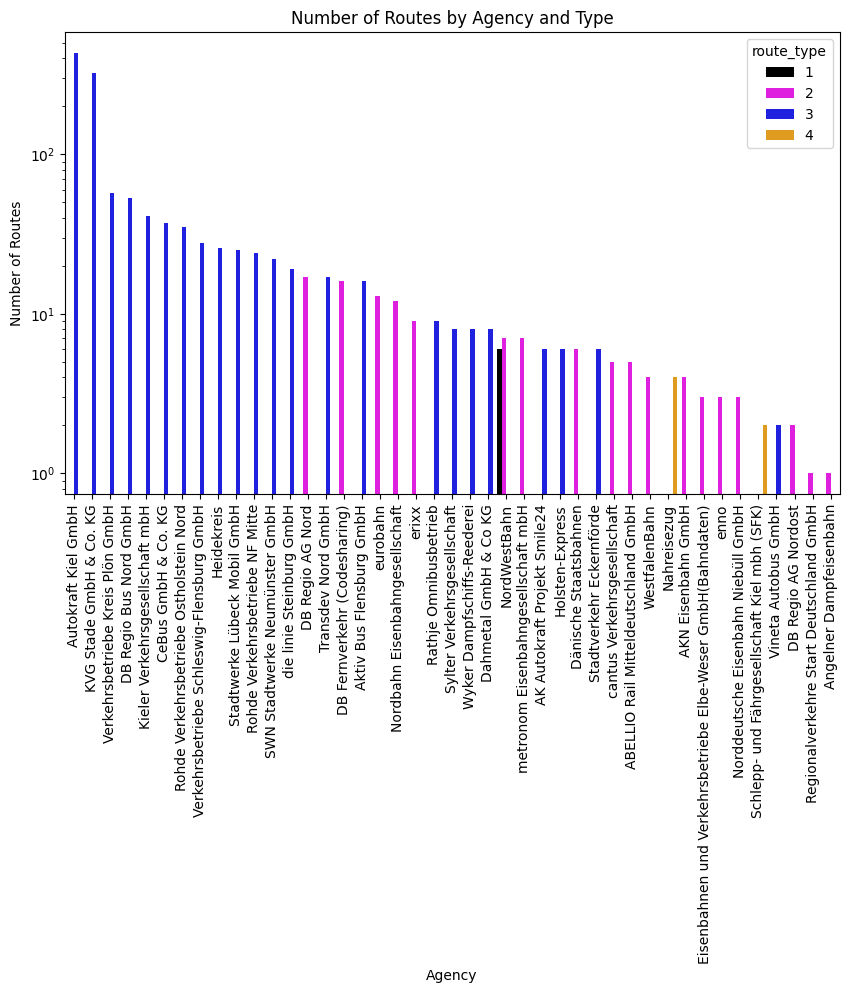

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

routes_agency = pd.merge(routes, agency, on='agency_id')

routes_by_agency_type = routes_agency.groupby(['agency_name', 'route_type']).size().reset_index(name='route_count')
routes_by_agency_type= routes_by_agency_type.sort_values(by='route_count', ascending=False)



custom_palette = ['black', 'magenta', 'blue', 'orange']

plt.figure(figsize=(10, 6))
sns.barplot(x='agency_name', y='route_count', hue='route_type', data=routes_by_agency_type,width=1,palette=custom_palette)
plt.yscale('log')
plt.title('Number of Routes by Agency and Type')
plt.xlabel('Agency')
plt.ylabel('Number of Routes')
plt.xticks(rotation=90)
plt.show()


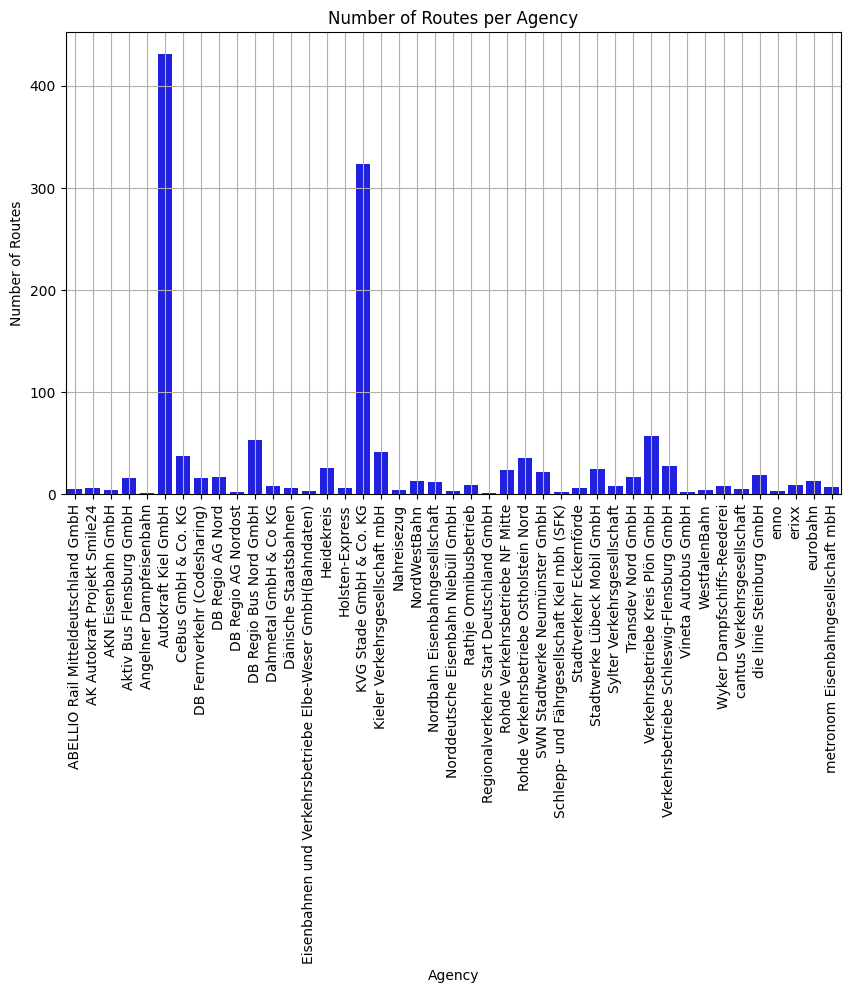

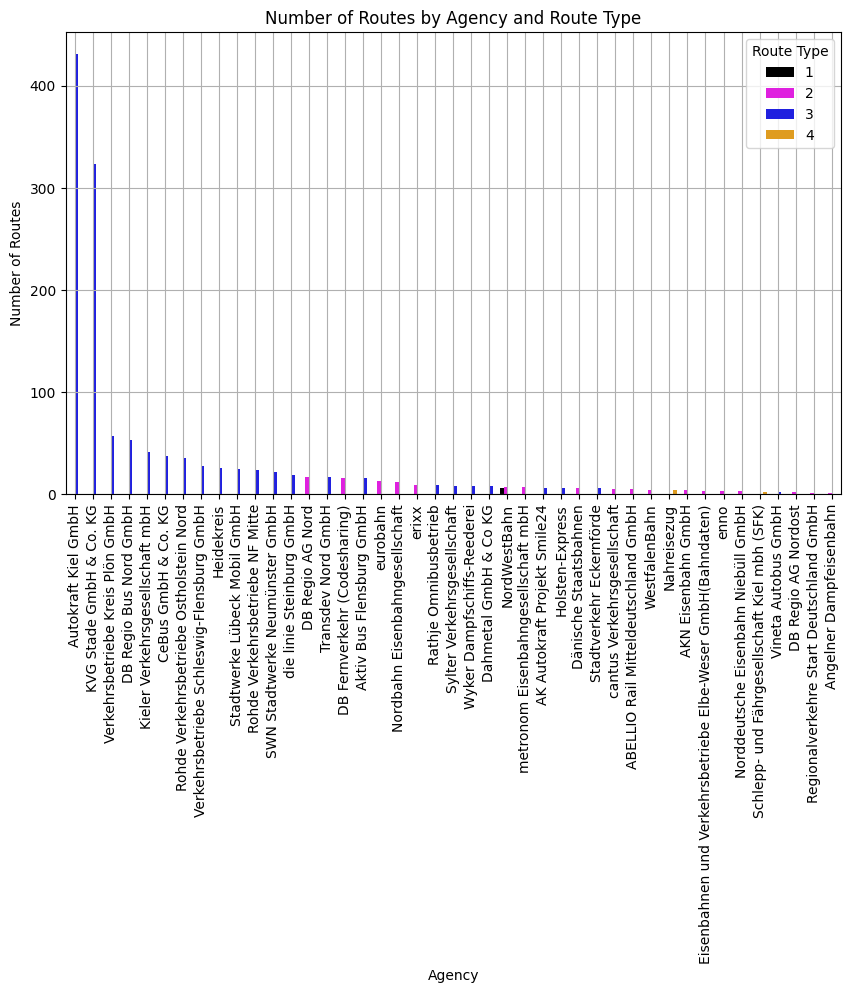

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


routes_agency = pd.merge(routes, agency, on='agency_id')

routes_by_agency_type = routes_agency.groupby(['agency_name', 'route_type']).size().reset_index(name='route_count')
routes_by_agency_type = routes_by_agency_type.sort_values(by='route_count', ascending=False)

routes_by_agency = routes_by_agency_type.groupby('agency_name')['route_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='agency_name', y='route_count', data=routes_by_agency, color='blue', width=0.8)
plt.title('Number of Routes per Agency')
plt.xlabel('Agency')
plt.ylabel('Number of Routes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

custom_palette = ['black', 'magenta', 'blue', 'orange']

plt.figure(figsize=(10, 6))
sns.barplot(x='agency_name', y='route_count', hue='route_type', data=routes_by_agency_type, width=0.8, palette=custom_palette)
plt.title('Number of Routes by Agency and Route Type')
plt.xlabel('Agency')
plt.ylabel('Number of Routes')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Route Type')
plt.show()


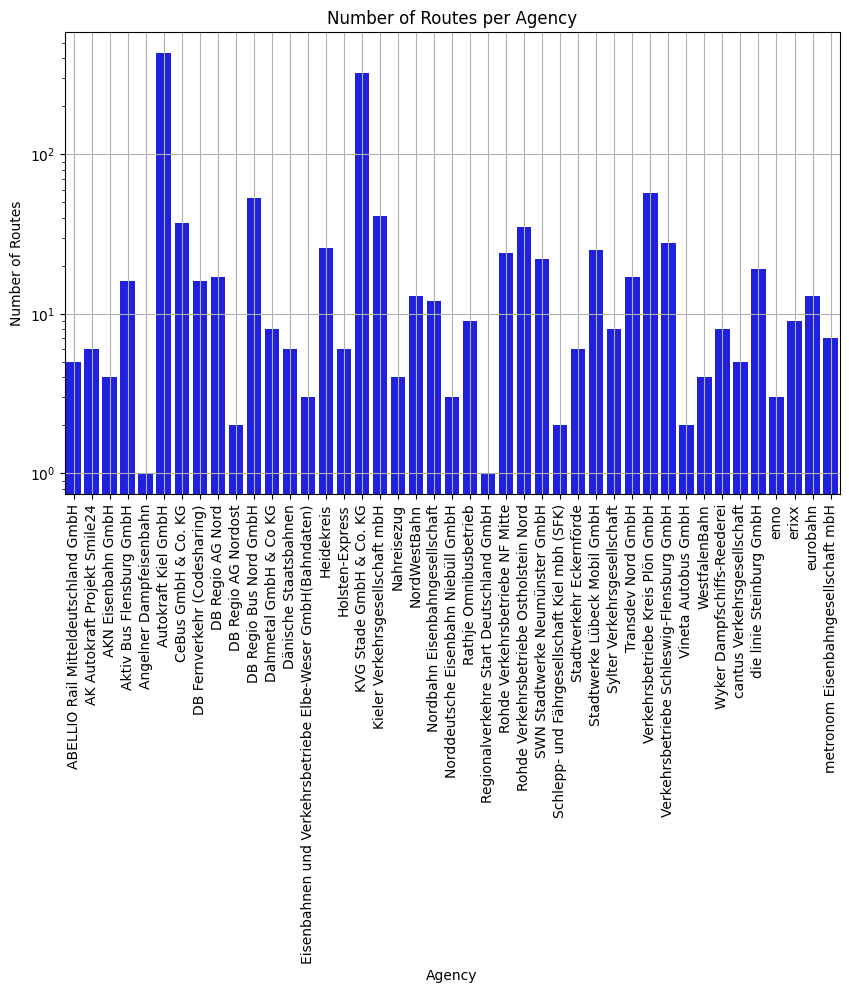

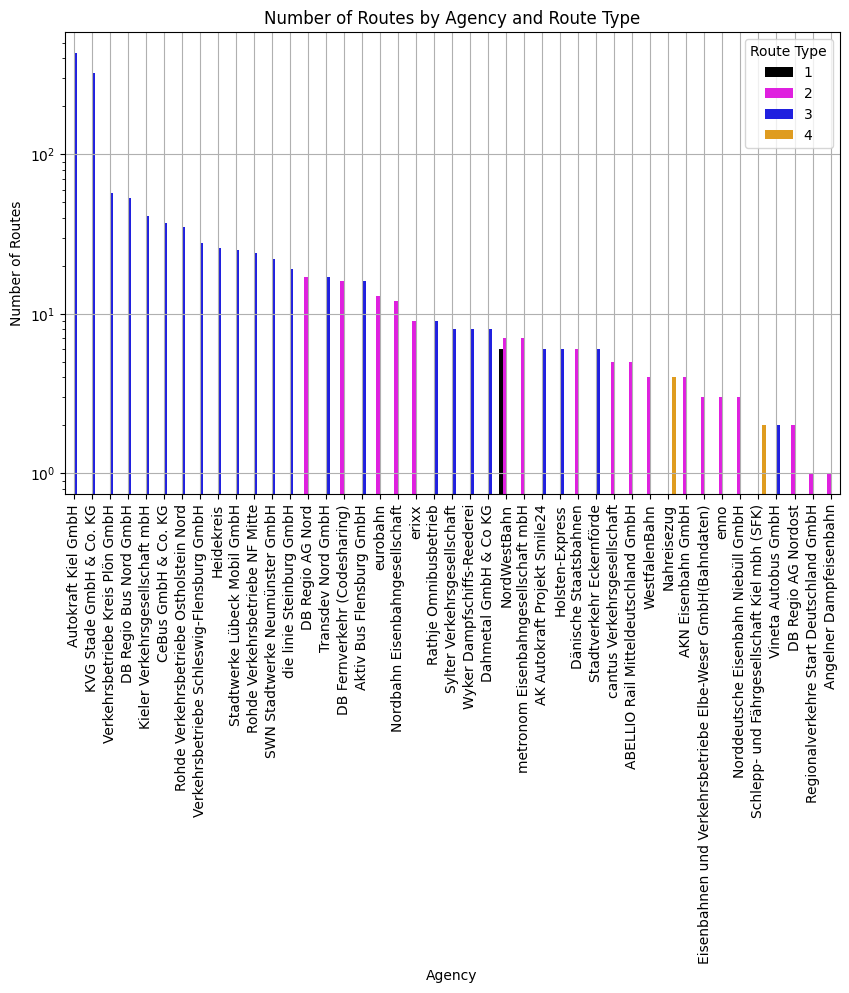

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


routes_agency = pd.merge(routes, agency, on='agency_id')

routes_by_agency_type = routes_agency.groupby(['agency_name', 'route_type']).size().reset_index(name='route_count')
routes_by_agency_type = routes_by_agency_type.sort_values(by='route_count', ascending=False)


routes_by_agency = routes_by_agency_type.groupby('agency_name')['route_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='agency_name', y='route_count', data=routes_by_agency, color='blue', width=0.8)
plt.yscale('log')
plt.title('Number of Routes per Agency')
plt.xlabel('Agency')
plt.ylabel('Number of Routes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

custom_palette = ['black', 'magenta', 'blue', 'orange']

plt.figure(figsize=(10, 6))
sns.barplot(x='agency_name', y='route_count', hue='route_type', data=routes_by_agency_type, width=0.8, palette=custom_palette)
plt.yscale('log')
plt.title('Number of Routes by Agency and Route Type')
plt.xlabel('Agency')
plt.ylabel('Number of Routes')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Route Type')
plt.show()


Task 3

/var/folders/v0/w03mq3b56mjgqrpl_m09yzy00000gn/T/ipykernel_67488/2648706651.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=routes_with_lengths, x='total_distance', bins=70, kde=False, palette=custom_palette)


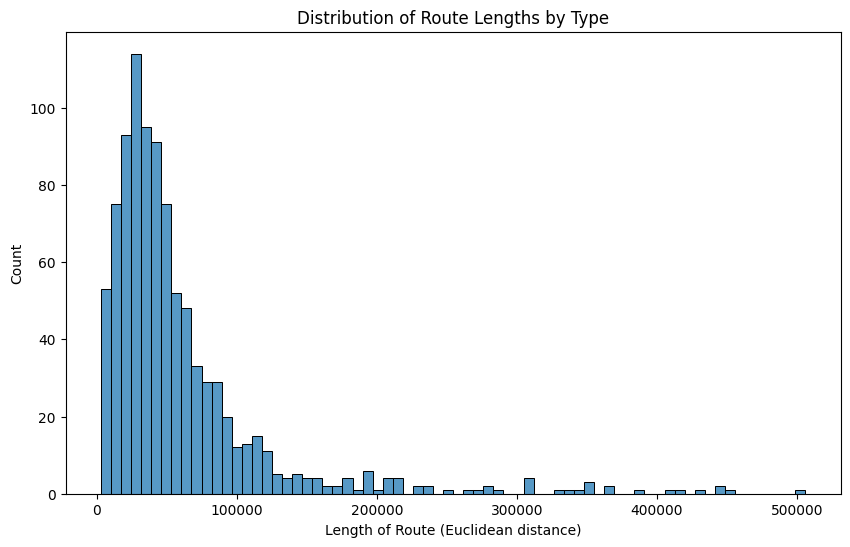

In [5]:
import numpy as np

def compute_euclidean_length(shape_df):
    shape_df['next_lat'] = shape_df['shape_pt_lat'].shift(-1)
    shape_df['next_lon'] = shape_df['shape_pt_lon'].shift(-1)
    shape_df.dropna(inplace=True)

    shape_df['distance'] = np.sqrt((shape_df['shape_pt_lat'] - shape_df['next_lat'])**2 + (shape_df['shape_pt_lon'] - shape_df['next_lon'])**2)
    return shape_df.groupby('shape_id')['distance'].sum().reset_index(name='total_distance')


shape_lengths = compute_euclidean_length(shapes)


trips_shapes = pd.merge(trips, shape_lengths, on='shape_id')

routes_length = pd.merge(routes, trips_shapes, on='route_id')

routes_max_length = routes_length.groupby('route_id')['total_distance'].max().reset_index()

routes_with_lengths = pd.merge(routes, routes_max_length, on='route_id')


plt.figure(figsize=(10, 6))
sns.histplot(data=routes_with_lengths, x='total_distance', bins=70, kde=False, palette=custom_palette)
plt.title('Distribution of Route Lengths by Type')
plt.xlabel('Length of Route (Euclidean distance)')
plt.ylabel('Count')
plt.show()


In [6]:
routes_with_lengths['total_distance'] = routes_with_lengths['total_distance']/1000

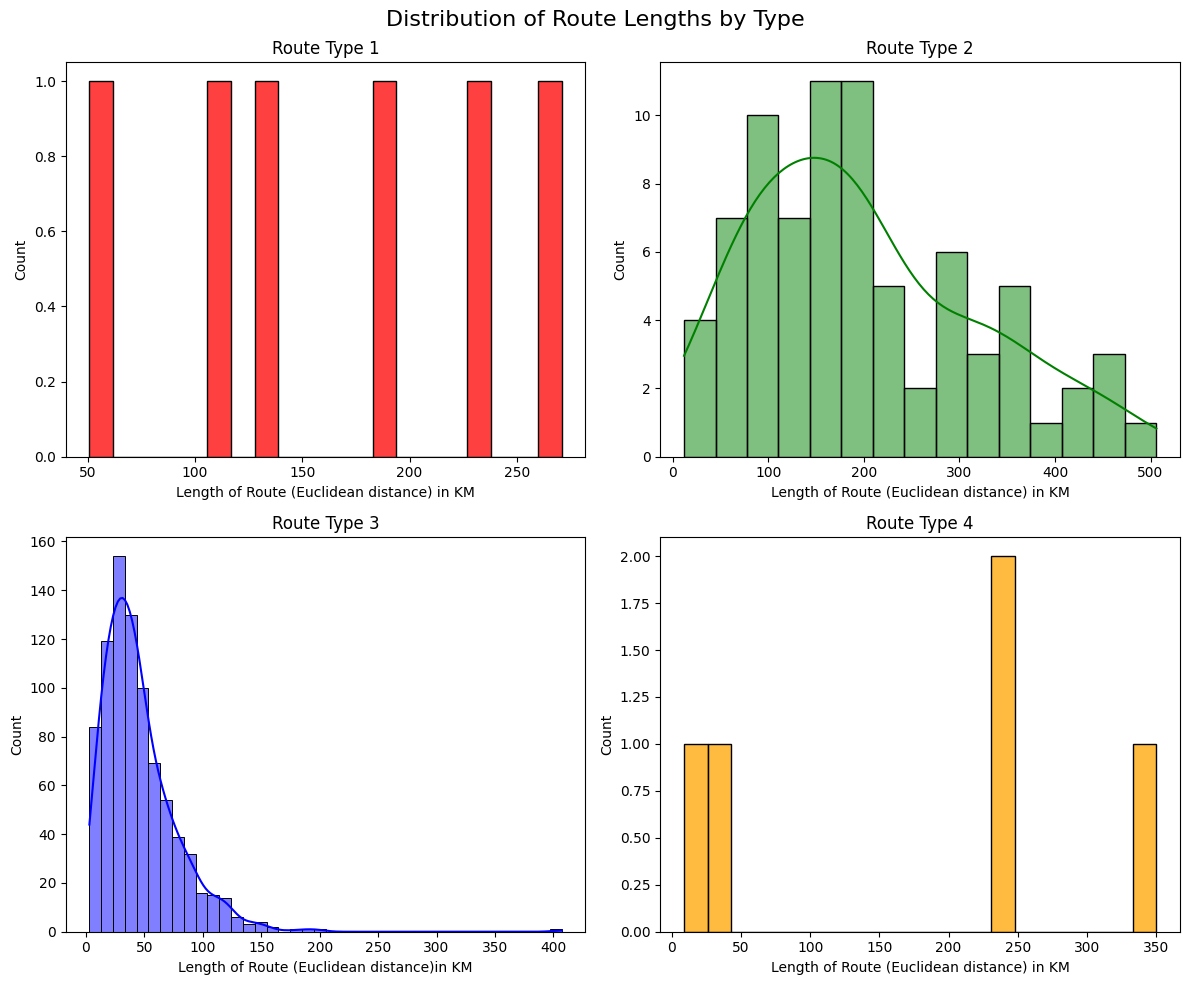

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


route_type_1 = routes_with_lengths[routes_with_lengths['route_type'] == 1]
route_type_3 = routes_with_lengths[routes_with_lengths['route_type'] == 3]
route_type_4 = routes_with_lengths[routes_with_lengths['route_type'] == 4]
route_type_2 = routes_with_lengths[routes_with_lengths['route_type'] == 2]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

sns.histplot(data=route_type_1, x='total_distance', bins=20, kde=False, color='red', ax=axes[0])
axes[0].set_title('Route Type 1')
axes[0].set_xlabel('Length of Route (Euclidean distance) in KM')
axes[0].set_ylabel('Count')

sns.histplot(data=route_type_2, x='total_distance', bins=15, kde=True, color='green', ax=axes[1])
axes[1].set_title('Route Type 2')
axes[1].set_xlabel('Length of Route (Euclidean distance) in KM')
axes[1].set_ylabel('Count')

sns.histplot(data=route_type_3, x='total_distance', bins=40, kde=True, color='blue', ax=axes[2])
axes[2].set_title('Route Type 3')
axes[2].set_xlabel('Length of Route (Euclidean distance)in KM')
axes[2].set_ylabel('Count')

sns.histplot(data=route_type_4, x='total_distance', bins=20, kde=False, color='orange', ax=axes[3])
axes[3].set_title('Route Type 4')
axes[3].set_xlabel('Length of Route (Euclidean distance) in KM')
axes[3].set_ylabel('Count')

fig.suptitle('Distribution of Route Lengths by Type', fontsize=16)
plt.tight_layout()

plt.show()


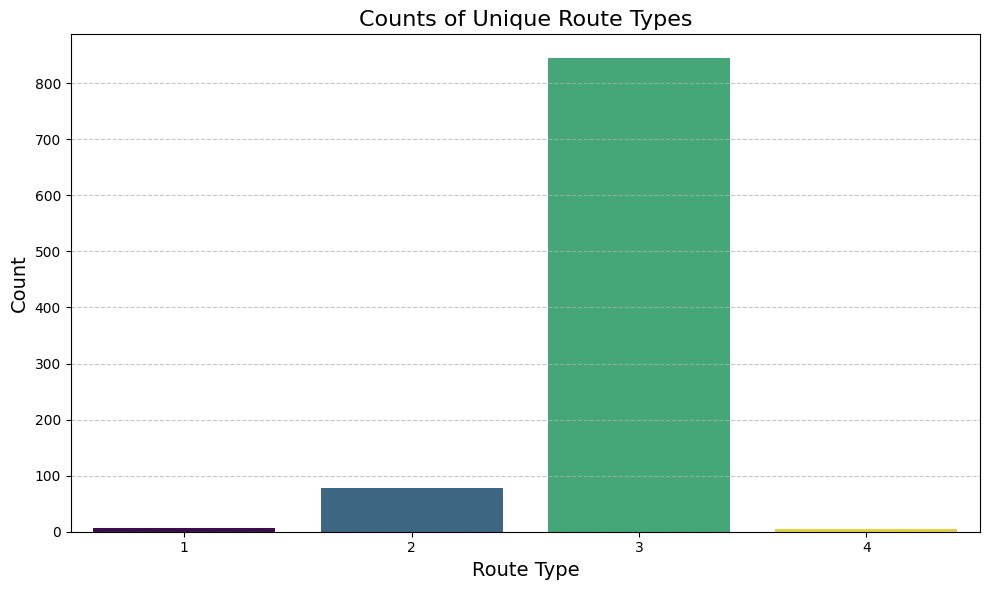

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

route_type_counts = routes_with_lengths['route_type'].value_counts()

route_type_df = route_type_counts.reset_index()
route_type_df.columns = ['route_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='route_type', y='count', data=route_type_df, palette='viridis', hue='route_type', legend=False)


plt.title('Counts of Unique Route Types', fontsize=16)
plt.xlabel('Route Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

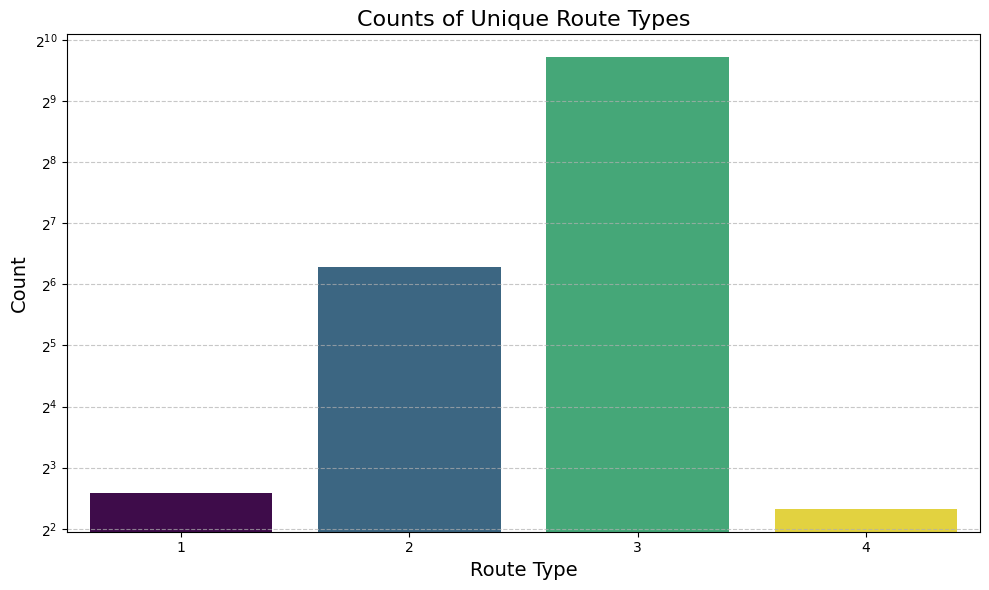

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

route_type_counts = routes_with_lengths['route_type'].value_counts()

route_type_df = route_type_counts.reset_index()
route_type_df.columns = ['route_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='route_type', y='count', data=route_type_df, palette='viridis', hue='route_type', legend=False)
plt.yscale('log', base=2)

plt.title('Counts of Unique Route Types', fontsize=16)
plt.xlabel('Route Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Task 4

In [10]:

stop_route_data = pd.merge(stop_times, trips, on='trip_id')


stop_route_data = pd.merge(stop_route_data, routes[['route_id', 'route_type']], on='route_id')


routes_per_stop = stop_route_data.groupby(['stop_id', 'route_id', 'route_type']).size().reset_index(name='count')


bus_routes = routes_per_stop[routes_per_stop['route_type'] == 3]
train_routes = routes_per_stop[routes_per_stop['route_type'] == 2 ]

bus_routes_count = bus_routes.groupby('stop_id')['route_id'].nunique().reset_index()
bus_routes_count.columns = ['stop_id', 'bus_route_count']

train_routes_count = train_routes.groupby('stop_id')['route_id'].nunique().reset_index()
train_routes_count.columns = ['stop_id', 'train_route_count']


In [11]:
print(bus_routes_count.head())
print(train_routes_count.head())

        stop_id  bus_route_count
0  000004398006                2
1  000009300010                3
2  000009300012                1
3  000009300013                1
4  000009300014                2
        stop_id  train_route_count
0  000003213941                  1
1  000005100028                  1
2  000005100048                  1
3  000005100065                  1
4  000005100066                  1


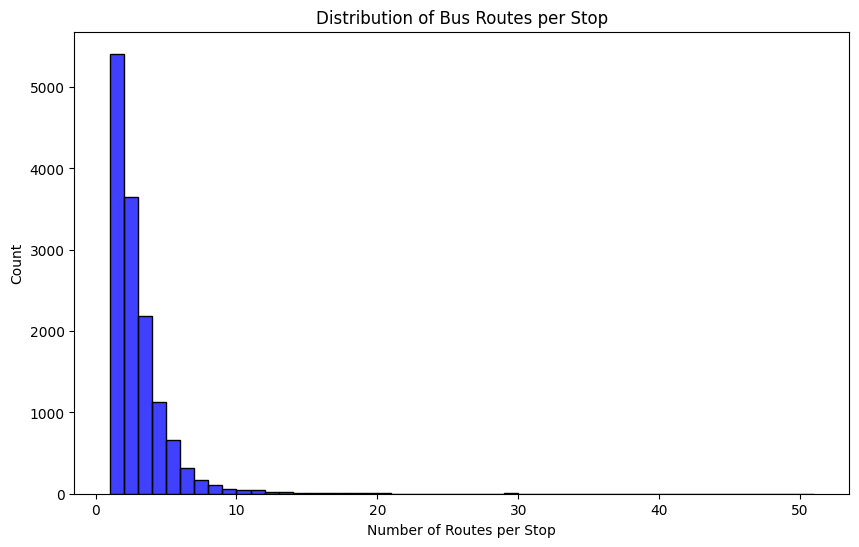

In [12]:

plt.figure(figsize=(10, 6))
sns.histplot(bus_routes_count['bus_route_count'], bins=50, kde=False, color='blue', label='Bus Routes')
plt.title('Distribution of Bus Routes per Stop')
plt.xlabel('Number of Routes per Stop')
plt.ylabel('Count')

plt.show()



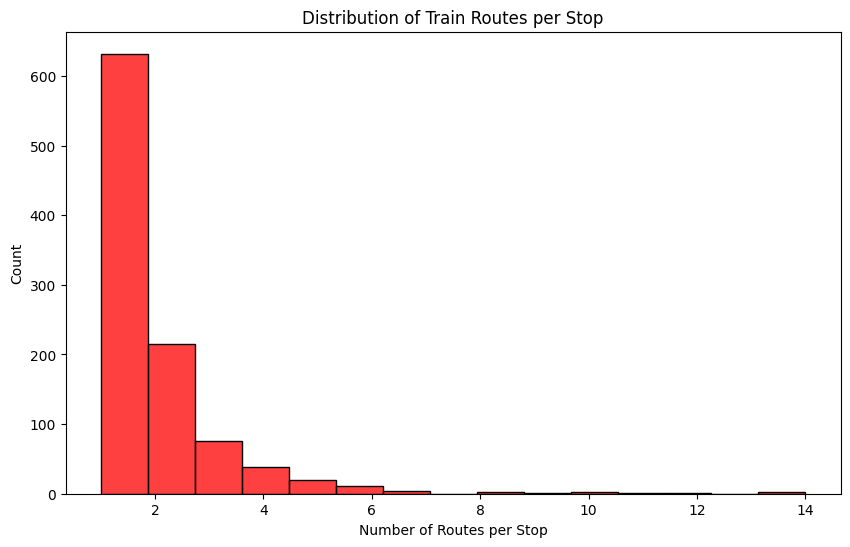

In [13]:

plt.figure(figsize=(10, 6))
sns.histplot(train_routes_count['train_route_count'], bins=15, kde=False, color='red', label='Train Routes')
#plt.yscale('log', base=2)
plt.title('Distribution of Train Routes per Stop')
plt.xlabel('Number of Routes per Stop')
plt.ylabel('Count')

plt.show()

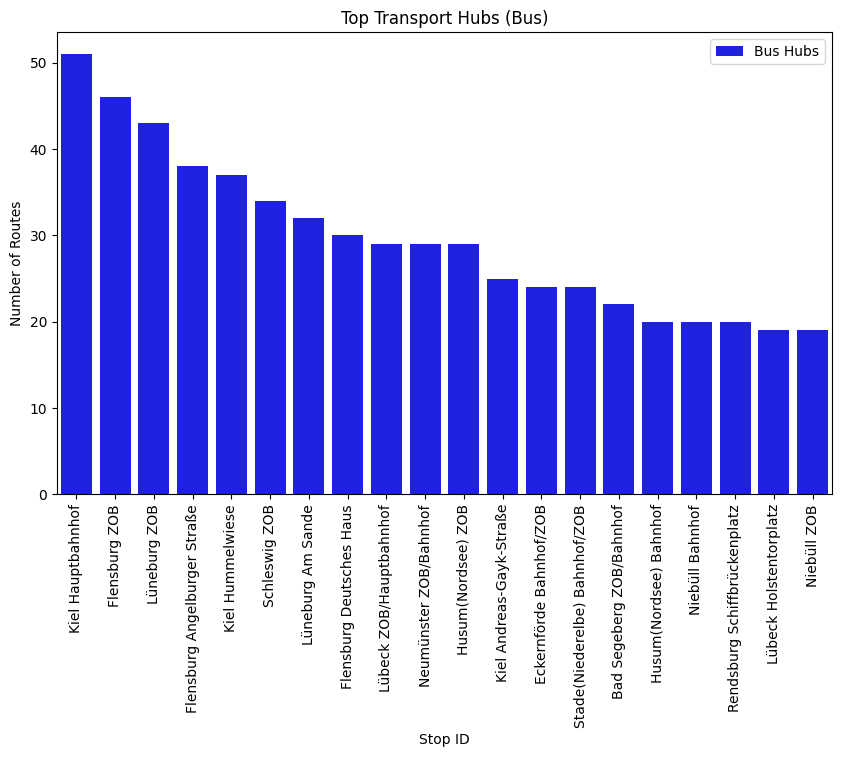

In [14]:

bus_hubs = bus_routes_count.nlargest(20, 'bus_route_count')
train_hubs = train_routes_count.nlargest(20, 'train_route_count')
data_train=pd.merge(train_hubs,stops,on='stop_id')
data_bus= pd.merge(bus_hubs,stops,on='stop_id')


plt.figure(figsize=(10, 6))
sns.barplot(x='stop_name', y='bus_route_count', data=data_bus, color='blue', label='Bus Hubs')

plt.title('Top Transport Hubs (Bus)')
plt.xlabel('Stop ID')
plt.ylabel('Number of Routes')
plt.xticks(rotation=90)
plt.show()


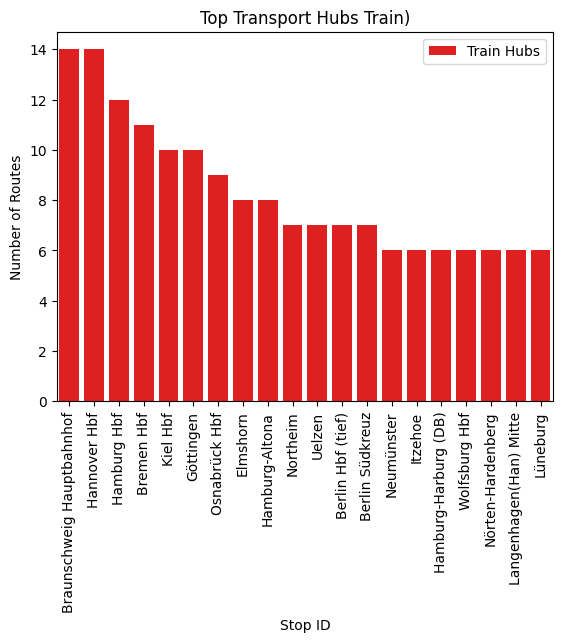

In [15]:
sns.barplot(x='stop_name', y='train_route_count', data=data_train, color='red', label='Train Hubs')
plt.title('Top Transport Hubs Train)')
plt.xlabel('Stop ID')
plt.ylabel('Number of Routes')
plt.xticks(rotation=90)
plt.show()

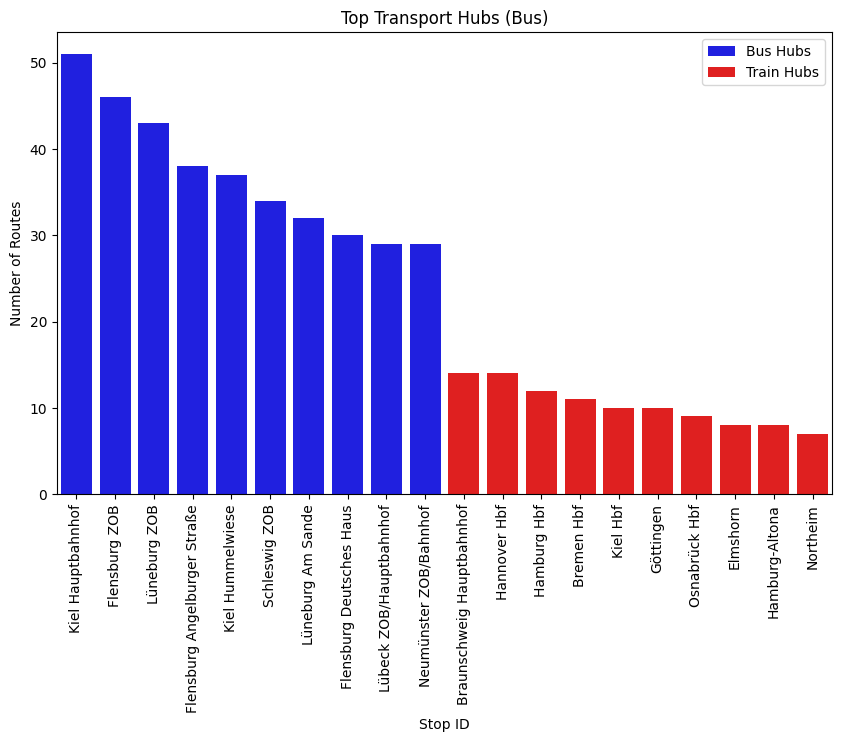

In [16]:

bus_hubs = bus_routes_count.nlargest(10, 'bus_route_count')
train_hubs = train_routes_count.nlargest(10, 'train_route_count')
data_train=pd.merge(train_hubs,stops,on='stop_id')
data_bus= pd.merge(bus_hubs,stops,on='stop_id')


plt.figure(figsize=(10, 6))
sns.barplot(x='stop_name', y='bus_route_count', data=data_bus, color='blue', label='Bus Hubs')
sns.barplot(x='stop_name', y='train_route_count', data=data_train, color='red', label='Train Hubs')
plt.title('Top Transport Hubs (Bus)')
plt.xlabel('Stop ID')
plt.ylabel('Number of Routes')
plt.xticks(rotation=90)
plt.show()

Task 5

In [17]:
with open('meta-data.md', 'r') as file:
    content = file.read()

print(content)

# traffic data
The files

agency.txt
routes.txt
shapes.txt
stops.txt
stop_times.txt
trips.txt

are in standard CSV format and they form a subset of a database of connected tables according to the General Transit Feed Specification (GTFS) specification, see here:
https://gtfs.org/documentation/schedule/reference/
The describe part of the public transport network in Schleswig-Holstein. Only the included tables are needed for the exam.
The original data is provided by the public transport network service of Schleswig-Holstein:
https://opendata.schleswig-holstein.de/dataset/fahrplandaten

# schematic map of germany
Some lines giving a schematic overview of germany are contained in the file
vg2500.npz
The line collections are just stored as unnamed arrrays of shape [2,N] and they can be imported and plotted via

tmp=np.load("vg2500.npz")
poslist=[tmp[k] for k in tmp.keys()]
del tmp

for pos in poslist:
    plt.plot(*pos,c="#808080")

You can use these lines to provide some orientation in a 

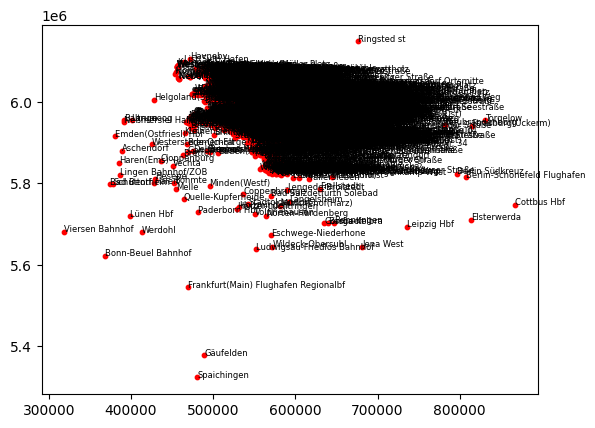

In [18]:

for idx, stop in stops.iloc[::10].iterrows():  
    plt.scatter(stop['stop_lon'], stop['stop_lat'], color="red", s=10)  
    plt.text(stop['stop_lon'], stop['stop_lat'], stop['stop_name'], fontsize=6)  
#
plt.show()


In [19]:
import numpy as np
import pandas as pd
import folium
from folium.plugins import MarkerCluster


shape_trip= pd.merge(shapes,trips,on='shape_id')
shapes=pd.merge(shape_trip, routes,on='route_id')

routes_per_stop = stop_route_data.groupby('stop_id')['route_id'].nunique().reset_index()
routes_per_stop.columns = ['stop_id', 'route_count']


top_10_stops = routes_per_stop.sort_values(by='route_count', ascending=False).head(2)


top_10_stops = pd.merge(top_10_stops, stops, on='stop_id')


m = folium.Map(location=[51.1657, 10.4515], zoom_start=6, tiles='openstreetmap')  


for route_id, group in shapes.groupby('route_id'):
    coordinates = list(zip(group['shape_pt_lat'], group['shape_pt_lon']))
    folium.PolyLine(locations=coordinates, color='blue', weight=2, opacity=0.7).add_to(m)


marker_cluster = MarkerCluster().add_to(m)

for idx, stop in top_10_stops.iterrows():
    folium.Marker(
        location=[stop['stop_lat'], stop['stop_lon']],
        popup=f"Stop: {stop['stop_name']}<br>Routes: {stop['route_count']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)


m.save('traffic_network_map.html')

m


KeyboardInterrupt: 